In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import pairwise_distances_argmin
from sklearn.metrics import pairwise_distances

In [8]:
A = [[1, 1, 0, 1], [0, 0, 0, 1], [1, 1, 0, 0]]
B = [[1, 2], [2, 1]]

In [9]:
np.linalg.svd(A)

(array([[ 0.78867513,  0.21132487,  0.57735027],
        [ 0.21132487,  0.78867513, -0.57735027],
        [ 0.57735027, -0.57735027, -0.57735027]]),
 array([2.17532775e+00, 1.12603250e+00, 5.73316705e-17]),
 array([[ 6.27963030e-01,  6.27963030e-01,  0.00000000e+00,
          4.59700843e-01],
        [-3.25057584e-01, -3.25057584e-01,  0.00000000e+00,
          8.88073834e-01],
        [ 7.07106781e-01, -7.07106781e-01,  0.00000000e+00,
         -2.77555756e-16],
        [ 0.00000000e+00,  0.00000000e+00,  1.00000000e+00,
          0.00000000e+00]]))

In [150]:
data = pd.read_csv("./gorns.csv")
data

,31.51,53.04
0,27.15,40.21
1,20.04,24.44
2,30.01,43.10
3,31.15,37.08
4,30.47,29.84
...,...,...
494,83.43,65.91
495,104.76,91.66
496,91.75,52.71
497,97.07,76.52


In [157]:
def KMeans(X, n_clusters, rseed=2):
    # 1. Randomly choose clusters
    rng = np.random.RandomState(rseed)
    center_indices = rng.permutation(X.shape[0])[:n_clusters]
#     print(i.shape)
    centers = X[center_indices]
    
    while True:
        # 2a. Assign labels based on closest center
        labels = pairwise_distances_argmin(X, centers)
        
        # 2b. Find new centers from means of points
        new_centers = np.array([X[labels == i].mean(0)
                                for i in range(n_clusters)])
        
        # 2c. Check for convergence
        if np.all(centers == new_centers):
            break
        centers = new_centers
        
    # Calculate the total in-cluster euclidean distance
    labels = pairwise_distances_argmin(X, centers)
    total_in_cluster_distance = 0
    for i in range(n_clusters):
        tmp = pairwise_distances(X[labels == i], centers[i].reshape(1,-1))
        inertia_i = pairwise_distances(X[labels == i], centers[i].reshape(1,-1))
        total_in_cluster_distance += inertia_i.sum(0).item()
        
    return centers, labels, total_in_cluster_distance

In [158]:
### Let's Cluster K-Means for the iris data used above
X = data.to_numpy()
n_clusters=range(1, 10)
plt.figure(figsize=(18, 12))
n_cluster_distance_list = []
for i, c_num in enumerate(n_clusters):
    centers, labels, total_cluster_distance = KMeans(X, c_num)
    n_cluster_distance_list.append(total_cluster_distance)

<Figure size 1800x1200 with 0 Axes>

D:\Program_Files\Python\Python310\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
D:\Program_Files\Python\Python310\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
D:\Program_Files\Python\Python310\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
D:\Program_Files\Python\Python310\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 1

[607082.8928268537,
 291128.36874421115,
 207704.4298459764,
 128981.79558458345,
 80298.97045247314,
 71923.22665876514,
 64194.04652152461,
 57180.85949221438,
 52118.334471509166]

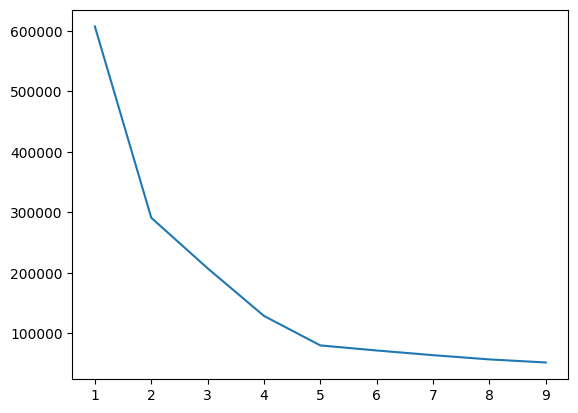

In [152]:
from sklearn.cluster import KMeans
inertia_list = []
# n_clusters = [1,2,3,4,5,6,7,8,9]

for n_cluster in n_clusters:
    kmeans = KMeans(n_clusters=n_cluster)
    kmeans.fit(X)

    # Get the cluster labels for each data point
    labels = kmeans.labels_

    # Get the cluster centroids
    centroids = kmeans.cluster_centers_

    # Calculate the total in-cluster distance (inertia)
    inertia = kmeans.inertia_

    inertia_list.append(inertia)
    
plt.plot(n_clusters,inertia_list)
inertia_list

[15993.280859136661,
 11318.75885124697,
 9240.645725128823,
 7196.054821331041,
 5675.962358917941,
 5367.370487697212,
 5101.086435987148,
 4924.763139477622,
 4677.469127194128]

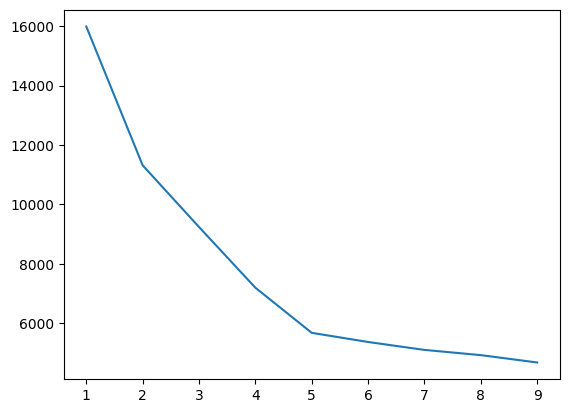

In [159]:
plt.plot(n_clusters,n_cluster_distance_list)
n_cluster_distance_list

In [142]:
n_cluster_distance_list

[]

D:\Program_Files\Python\Python310\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
D:\Program_Files\Python\Python310\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
D:\Program_Files\Python\Python310\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
D:\Program_Files\Python\Python310\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 1

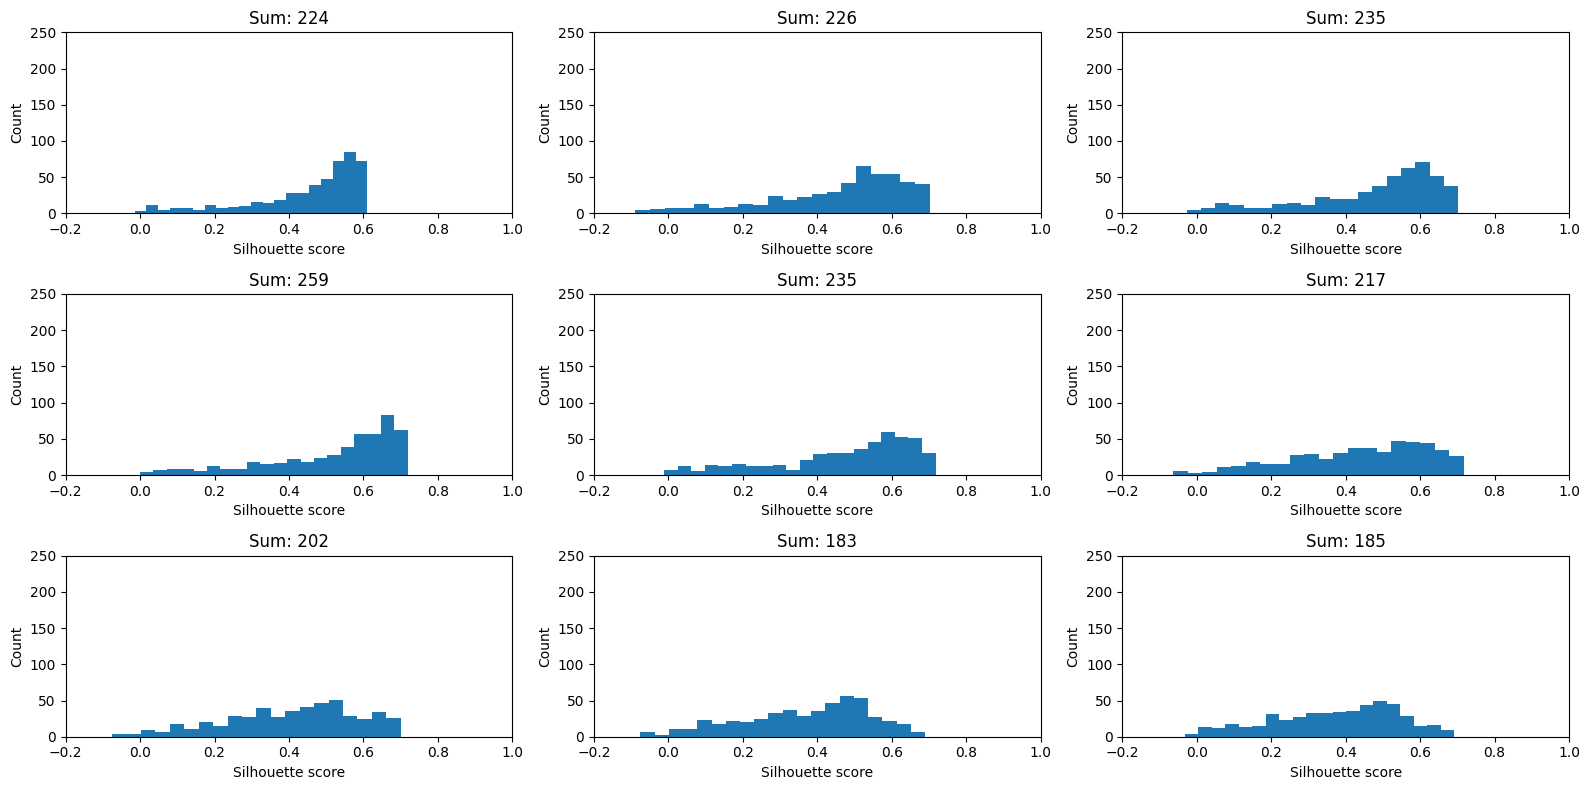

In [132]:
from sklearn.cluster import KMeans as sk_KMeans, DBSCAN as sk_DBSCAN
from sklearn.metrics import silhouette_samples, silhouette_score

numClusters = 9 # how many clusters are we looping over? (from 2 to 10)
Q = np.empty([numClusters,1])*np.NaN # init container to store sums

# Compute kMeans:
plt.figure(figsize=(16, 8))
for ii in range(2, 11): # Loop through each cluster (from 2 to 10!)
    kMeans = sk_KMeans(n_clusters = int(ii)).fit(X) # compute kmeans using scikit
    cId = kMeans.labels_ # vector of cluster IDs that the row belongs to
    cCoords = kMeans.cluster_centers_ # coordinate location for center of each cluster
    s = silhouette_samples(X,cId) # compute the mean silhouette coefficient of all samples
    Q[ii-2] = sum(s) # take the sum
    # Plot data:
    plt.subplot(3,3,ii-1) 
    plt.hist(s,bins=20) 
    plt.xlim(-0.2,1)
    plt.ylim(0,250)
    plt.xlabel('Silhouette score')
    plt.ylabel('Count')
    plt.title('Sum: {}'.format(int(Q[ii-2]))) # sum rounded to nearest integer
    plt.tight_layout() # adjusts subplot padding

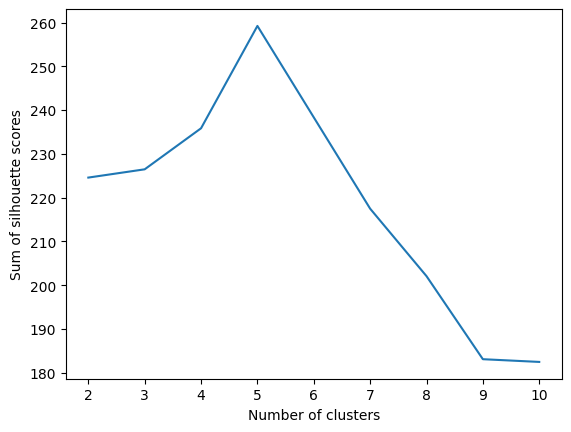

In [84]:
plt.plot(np.linspace(2,10,9),Q)
plt.xlabel('Number of clusters')
plt.ylabel('Sum of silhouette scores')
plt.show()